<a href="https://colab.research.google.com/github/erickgt00/Datos-Masivos/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final | Predicción de la Inflación en México

El objetivo principal de esta tesina es desarrollar un modelo predictivo preciso y confiable que permita estimar la tasa de inflación en México utilizando técnicas avanzadas de Machine Learning en combinación con el análisis económico tradicional. La inflación es un indicador económico crucial que afecta directamente la estabilidad y el crecimiento económico del país, así como el bienestar de sus ciudadanos. Por lo tanto, contar con un método preciso de predicción de la inflación se convierte en una herramienta esencial para tomar decisiones informadas en materia de política monetaria y fiscal.

## Análisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("df.csv")
df.head(10)

,Fecha,INPC Mexico,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP
0,ene-96,0.517,7.370,0.027,313.5091,-1.629,0.414,57939.4,5245.8,6428.2
1,feb-96,0.489,7.610,0.027,281.9257,0.848,-0.164,57822.5,9860.7,7274.4
2,mar-96,0.438,7.529,0.028,337.3185,3.895,-0.375,59499.4,13137.2,3326.2
3,abr-96,0.369,7.415,0.029,393.3877,-0.351,0.005,57172.2,9476.9,2484.8
4,may-96,0.338,7.470,0.029,413.5420,-2.529,0.311,60519.1,13756.7,4354.8
5,jun-96,0.318,7.585,0.028,365.2451,-0.573,0.167,61592.3,12151.4,3630.6
6,jul-96,0.310,7.585,0.030,373.6705,-0.114,0.205,61481.8,22981.2,4498.8
7,ago-96,0.306,7.580,0.029,386.0666,0.532,0.217,60983.6,28060.5,2592.7
8,sep-96,0.300,7.535,0.030,339.2533,1.529,0.257,61639.9,24621.1,3002.2
9,oct-96,0.290,7.970,0.030,348.9010,2.551,-0.511,64179.6,35863.0,5485.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            329 non-null    object 
 1   INPC Mexico      329 non-null    float64
 2   USD.MXN          329 non-null    float64
 3   IPC USA          329 non-null    float64
 4   Remesas.MDD      329 non-null    float64
 5   IPE              329 non-null    float64
 6   IPI              329 non-null    float64
 7   B.Monetaria.MDP  329 non-null    float64
 8   AIN.MDP          329 non-null    float64
 9   DineroNuevo.MDP  329 non-null    float64
dtypes: float64(9), object(1)
memory usage: 25.8+ KB


In [ ]:
df.shape

(329, 10)

In [ ]:
df = df.drop(columns=['Fecha'])
df.head()

,INPC Mexico,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP
0,0.517,7.370,0.027,313.5091,-1.629,0.414,57939.4,5245.8,6428.2
1,0.489,7.610,0.027,281.9257,0.848,-0.164,57822.5,9860.7,7274.4
2,0.438,7.529,0.028,337.3185,3.895,-0.375,59499.4,13137.2,3326.2
3,0.369,7.415,0.029,393.3877,-0.351,0.005,57172.2,9476.9,2484.8
4,0.338,7.470,0.029,413.5420,-2.529,0.311,60519.1,13756.7,4354.8


In [ ]:
df.describe()

,INPC Mexico,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,3.290000e+02,3.290000e+02,329.000000
mean,0.073046,13.450888,0.025036,1942.825774,0.206836,0.203766,7.949023e+05,1.768344e+06,18772.965653
std,0.072078,4.238461,0.017020,1187.409903,2.065758,0.564586,7.089339e+05,1.422600e+06,25688.701856
min,0.021000,7.370000,-0.021000,281.925700,-11.520000,-2.425000,5.717220e+04,5.245800e+03,298.500000
25%,0.038000,10.201000,0.016000,912.205000,-0.757000,-0.092000,2.274567e+05,4.781150e+05,4704.800000
50%,0.046000,12.346900,0.022000,1889.655800,0.405000,0.170000,5.476533e+05,1.253285e+06,9351.300000
75%,0.068000,18.009900,0.032000,2367.642800,1.390000,0.493000,1.245686e+06,3.208490e+06,20397.700000
max,0.517000,24.151000,0.091000,5693.093000,5.708000,2.204000,2.700041e+06,4.694191e+06,153338.700000


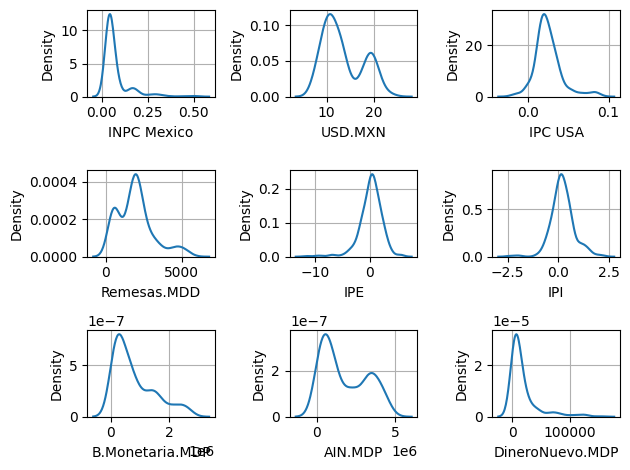

In [ ]:
r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()



De lo anterior podemos observar lo siguiente:

* Que la mayor densidad de inflación en México la encontramos en niveles entre el 2 y 13 por ciento. En cambio la inlfación en Estdos Unidos se encuentra en niveles del 0 al 7 por ciento.
* Las remesas concentran gran densidad entre 1,000 y 3,500 millones de dólares.
* Que la gran densidad de los índices de precios de exportación e importación se encuentran muy cercanos al 0.
* Que por lo general, Banxico emite cerca entre 10,000 y 40,000 millones de pesos nuevos al mes.

In [ ]:
matriz_correlacion = df.corr()

In [ ]:
matriz_correlacion

,INPC Mexico,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP
INPC Mexico,1.000000,-0.443299,0.092321,-0.447069,-0.010854,-0.106988,-0.335241,-0.432503,-0.157878
USD.MXN,-0.443299,1.000000,0.105545,0.844594,-0.028681,0.091768,0.929778,0.970109,0.391286
IPC USA,0.092321,0.105545,1.000000,0.435560,0.065541,0.353878,0.337938,0.141140,0.080785
Remesas.MDD,-0.447069,0.844594,0.435560,1.000000,0.014369,0.201878,0.925386,0.858270,0.365888
IPE,-0.010854,-0.028681,0.065541,0.014369,1.000000,0.520769,0.023370,-0.033136,-0.199779
IPI,-0.106988,0.091768,0.353878,0.201878,0.520769,1.000000,0.154805,0.094280,-0.069220
B.Monetaria.MDP,-0.335241,0.929778,0.337938,0.925386,0.023370,0.154805,1.000000,0.951473,0.408201
AIN.MDP,-0.432503,0.970109,0.141140,0.858270,-0.033136,0.094280,0.951473,1.000000,0.391589
DineroNuevo.MDP,-0.157878,0.391286,0.080785,0.365888,-0.199779,-0.069220,0.408201,0.391589,1.000000


In [ ]:
from tabulate import tabulate

In [ ]:
tabla_latex = tabulate(matriz_correlacion, headers='keys', tablefmt='latex')

print(tabla_latex)

\begin{tabular}{lrrrrrrrrr}
\hline
                 &   INPC Mexico &    USD.MXN &   IPC USA &   Remesas.MDD &        IPE &        IPI &   B.Monetaria.MDP &    AIN.MDP &   DineroNuevo.MDP \\
\hline
 INPC Mexico     &     1         & -0.443299  & 0.0923213 &    -0.447069  & -0.010854  & -0.106988  &         -0.335241 & -0.432503  &        -0.157878  \\
 USD.MXN         &    -0.443299  &  1         & 0.105545  &     0.844594  & -0.0286815 &  0.0917678 &          0.929778 &  0.970109  &         0.391286  \\
 IPC USA         &     0.0923213 &  0.105545  & 1         &     0.43556   &  0.0655405 &  0.353878  &          0.337938 &  0.14114   &         0.0807848 \\
 Remesas.MDD     &    -0.447069  &  0.844594  & 0.43556   &     1         &  0.0143691 &  0.201878  &          0.925386 &  0.85827   &         0.365888  \\
 IPE             &    -0.010854  & -0.0286815 & 0.0655405 &     0.0143691 &  1         &  0.520769  &          0.02337  & -0.0331356 &        -0.199779  \\
 IPI             &    

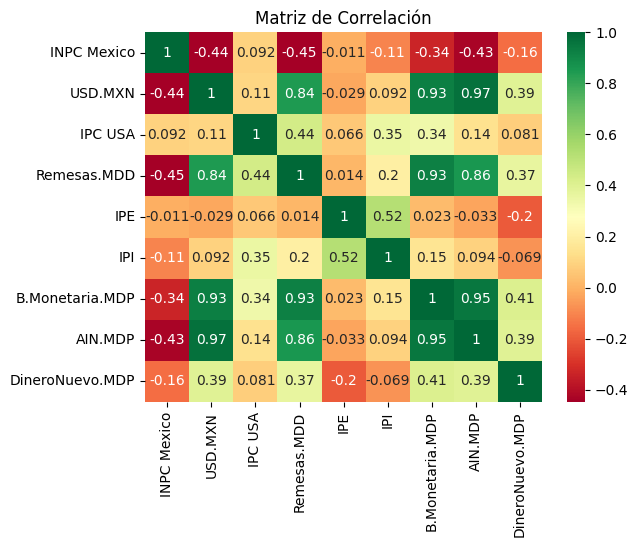

In [ ]:
sns.heatmap(matriz_correlacion, annot=True, cmap='RdYlGn')
plt.title('Matriz de Correlación')
plt.show()

De lo anterior podemos destacar lo siguiente para la inflación en México:

* El Índice Nacional de Precios al Consumidor de México muestra una correlación negativa moderada con el Tipo de Cambio y las Remesas hacia México. Esto sugiere que un aumento en el tipo de cambio o en las remesas podría estar asociado con una disminución en el nivel general de precios en México.

* Que el Tipo de Cambio muestra una fuerte correlación positiva con las Remesas y los Activos Internacionales Netos de Banco de México. Esto indica que un tipo de cambio más alto se asocia con mayores remesas y mayores activos internacionales netos para el Banco de México.

* Que el Índice de Precios al Consumidor de Estados Unidos muestra una correlación moderada con las Remesas y el Índice de Precios de Importaciones. Esto sugiere que los cambios en los precios en Estados Unidos pueden tener algún impacto en las remesas hacia México y en los precios de importaciones en México.

* También que el Índice de Precios de Exportaciones muestra una correlación moderada con Índice de Precios de Importaciones. Esto indica que los precios de las exportaciones y las importaciones pueden tener cierta relación lineal positiva.

* A su vez, la Base Monetaria del Banco de México muestra una correlación fuerte con el Tipo de Cambio, las Remesas y los Activos Internacionales de Banxico. Esto sugiere que cambios significativos en la base monetaria pueden estar asociados con cambios en el tipo de cambio, remesas y activos internacionales netos del Banco de México.

<Axes: xlabel='USD.MXN', ylabel='Remesas.MDD'>

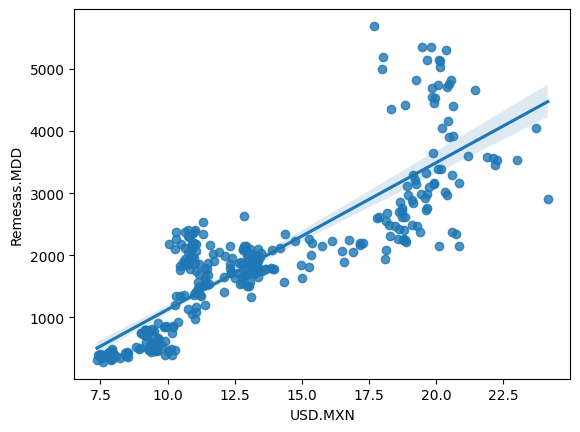

In [ ]:
sns.regplot(x = df['USD.MXN'], y = df['Remesas.MDD'], data = df)


Esta alta correlación sugiere que existe una estrecha interacción entre las remesas que llegan a México y el tipo de cambio del peso mexicano con respecto al dólar estadounidense. A continuación, se detallan algunos aspectos importantes sobre esta relación:

Influencia en el flujo de remesas: Un tipo de cambio favorable, es decir, un peso mexicano más débil en comparación con el dólar, puede incentivar a los trabajadores mexicanos en el extranjero a enviar más remesas a sus familias en México. Esto se debe a que, cuando el tipo de cambio es más favorable, los dólares que envían se convierten en una mayor cantidad de pesos, lo que aumenta el poder adquisitivo de las familias en el país receptor.

Efecto en la economía mexicana: Las remesas son una fuente significativa de ingresos para muchas familias en México y desempeñan un papel importante en la economía del país. El aumento de las remesas puede tener un impacto positivo en el consumo interno y en el bienestar económico de las familias receptoras. Además, las remesas también pueden influir en el crecimiento económico y en la estabilidad financiera de México.

Impacto en la balanza de pagos: Las remesas son una de las principales fuentes de ingresos de divisas en México, lo que puede ayudar a mejorar la balanza de pagos del país. Una mayor entrada de divisas a través de las remesas puede tener un efecto estabilizador en el tipo de cambio y en las reservas internacionales.

Sensibilidad a cambios en el tipo de cambio: Dado que las remesas están fuertemente relacionadas con el tipo de cambio, cualquier variación significativa en este último puede tener un impacto directo en el flujo de remesas hacia México. Un fortalecimiento del peso mexicano puede reducir el monto en pesos que los trabajadores en el extranjero envían a sus familias, mientras que un debilitamiento del peso puede aumentar dicho monto.

## Modelo de Predicción

Para este apartado utilizaremos los siguientes modelos:

* Linear Regression
* Support Vector Regression
* Random Forest
* Gradient Boosting
* Neural Network

In [ ]:
# Se dividen los datos en características (X) y variable objetivo (y)
X = df.drop(columns=['INPC Mexico'])
y = df['INPC Mexico']

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [ ]:
# Creación y entrenamiento de los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Comparación de resultados
print("Resultados de los modelos:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R2 Score: {result['R2 Score']}")
    print()

Resultados de los modelos:
Linear Regression:
  MSE: 0.0017188566387374416
  R2 Score: 0.5585007964645168

Support Vector Regression:
  MSE: 0.004054277041911431
  R2 Score: -0.041366711205699014

Random Forest:
  MSE: 5.571528181818198e-05
  R2 Score: 0.9856891773327003

Gradient Boosting:
  MSE: 5.180189762686952e-05
  R2 Score: 0.9866943548237457

Neural Network:
  MSE: 1590881.1649867634
  R2 Score: -408627892.3519286



In [ ]:
# Identificar el modelo con el menor MSE y el mayor R2 Score
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"El mejor modelo es: {best_model}")

El mejor modelo es: Gradient Boosting


In [ ]:
predictions = pd.DataFrame({'Real': y_test})

# Hacer las predicciones para cada modelo y agregarlas a la tabla
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

print(predictions)

      Real  Linear Regression  Support Vector Regression  Random Forest  \
38   0.183           0.139004                   0.214832        0.16732   
184  0.032           0.055433                  -0.043360        0.03419   
27   0.151           0.147523                   0.229551        0.15962   
6    0.310           0.166764                   0.285271        0.31281   
39   0.182           0.144517                   0.216372        0.17318   
..     ...                ...                        ...            ...   
281  0.039           0.020799                   0.114888        0.03878   
303  0.061           0.033105                   0.129496        0.04730   
304  0.059          -0.003315                   0.129188        0.05414   
297  0.041           0.001265                   0.127299        0.03354   
107  0.052           0.076974                   0.061620        0.04458   

     Gradient Boosting  Neural Network  
38            0.169083       28.425477  
184           0.0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
Real=pd.DataFrame(y_test)
Real.columns = ["Real"]
Real.head()

,Real
38,0.183
184,0.032
27,0.151
6,0.310
39,0.182


In [ ]:
predictions=pd.DataFrame(predictions)
rf = predictions['Random Forest']
gb = predictions['Gradient Boosting']
predictions_mejores = pd.DataFrame({'Predicción RF': rf, 'Predicción GB': gb})
predictions_mejores.head()

,Predicción RF,Predicción GB
38,0.16732,0.169083
184,0.03419,0.036665
27,0.15962,0.155706
6,0.31281,0.304885
39,0.17318,0.168133


In [ ]:
RealPredictions=pd.concat([predictions_mejores,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predicción RF,Predicción GB,Real
38,0.16732,0.169083,0.183
184,0.03419,0.036665,0.032
27,0.15962,0.155706,0.151
6,0.31281,0.304885,0.310
39,0.17318,0.168133,0.182


De lo anterior podemos concluir que nuestros modelos de Gradient Boossting y Random Forest cumplen con los mejores resultados de precisión.